Uk coronavirus data interpretation (example project).


In [2]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfcase = pd.read_csv('cases.csv')
dfdeath = pd.read_csv('deaths.csv')

In [4]:
ukdates = dfcase.columns[41:]
dfuk = pd.DataFrame()
dfuk['dates'] = ukdates

In [5]:
dfcase.head()

,Country,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15
0,United States,1,1,2,2,5,5,5,5,5,...,1228603,1257023,1283929,1309550,1329260,1347881,1369574,1390406,1417774,1442824
1,Russia,0,0,0,0,0,0,0,0,0,...,165929,177160,187859,198676,209688,221344,232243,242271,252245,262843
2,United Kingdom,0,0,0,0,0,0,0,0,0,...,202359,207977,212629,216525,220449,224332,227741,230985,234440,238004
3,Spain,0,0,0,0,0,0,0,0,0,...,220325,221447,222857,223578,224350,227436,228030,228691,229540,230183
4,Italy,0,0,0,0,0,0,0,0,0,...,214457,215858,217185,218268,219070,219814,221216,222104,223096,223885


In [6]:
cases = np.array(dfcase.iloc[2, :][1:])

In [7]:
dfuk['cases'] = cases[40:]

In [8]:
deaths = np.array(dfdeath.iloc[2,:][1:])
dfuk['deaths'] = deaths[40:]

In [9]:
dfuk['datefrom'] = np.array([i for i in range(dfuk.shape[0])])

In [10]:
change_cases = cases[40:] - cases[39:-1]
change_deaths = deaths[40:] - deaths[39:-1]

In [11]:
dfuk['changecases'] = change_cases
dfuk['changedeaths'] = change_deaths

In [12]:
dfuk.head()

,dates,cases,deaths,datefrom,changecases,changedeaths
0,2020-03-02,40,0,0,4,0
1,2020-03-03,51,0,1,11,0
2,2020-03-04,85,0,2,34,0
3,2020-03-05,115,1,3,30,1
4,2020-03-06,163,2,4,48,1


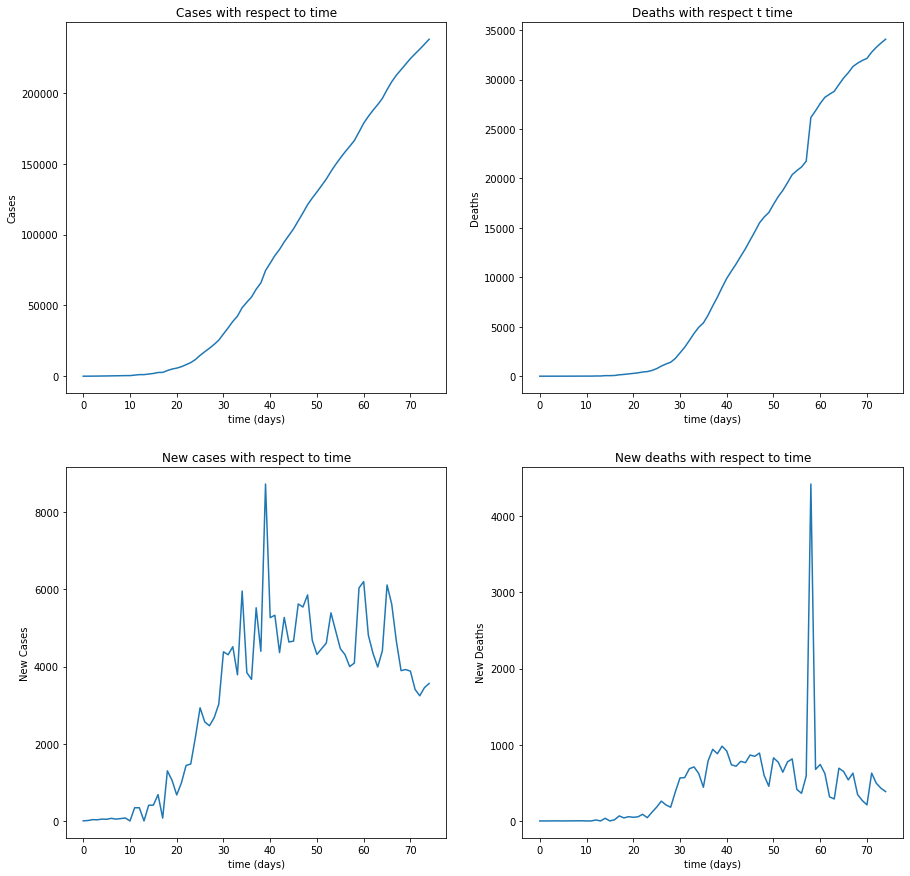

In [13]:
fig, axs = plt.subplots(2,2, figsize=(15, 15))
plot_titles = ['Cases with respect to time', 'Deaths with respect t time',
               'New cases with respect to time', 'New deaths with respect to time']
axs = axs.ravel()
xlabel = 'time (days)'
ylabel = ['Cases', 'Deaths', 'New Cases', 'New Deaths']
tograph = ['cases', 'deaths', 'changecases', 'changedeaths']
for column, title, ylab, i in zip(tograph, plot_titles, ylabel, range(4)):
    axs[i].plot(dfuk['datefrom'], dfuk[column])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel(ylab)
    axs[i].set_title(title)

Above represents the linear plots for cases, deaths, new deaths and new cases with respect to time.

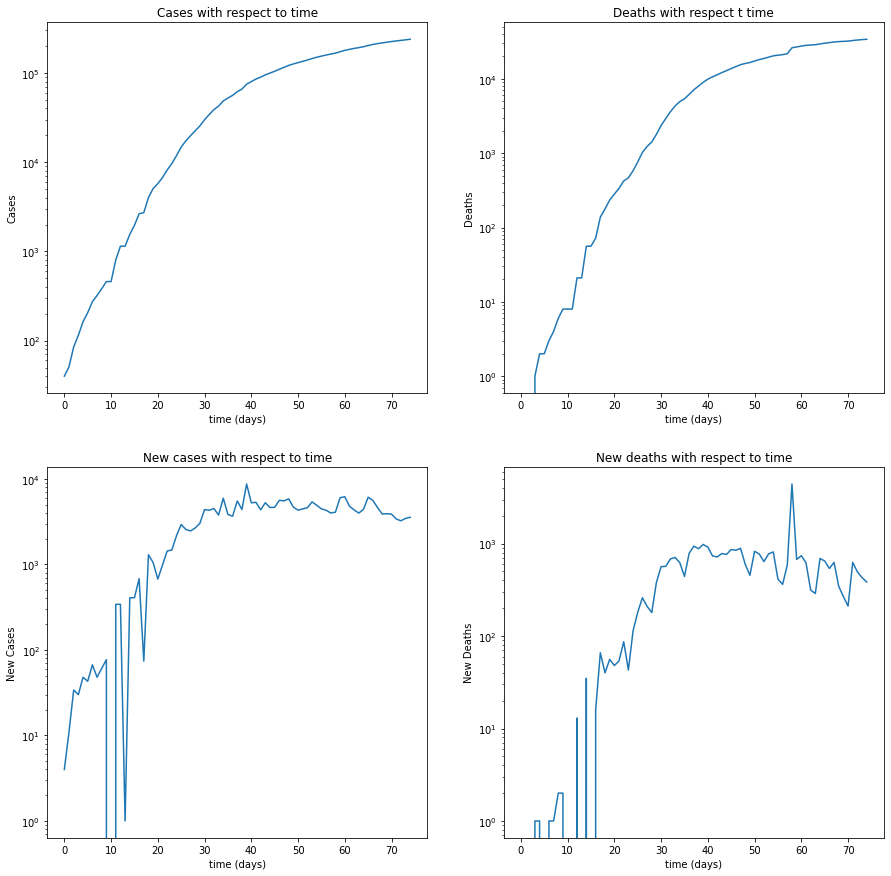

In [14]:
fig, axs = plt.subplots(2,2, figsize=(15, 15))
plot_titles = ['Cases with respect to time', 'Deaths with respect t time',
               'New cases with respect to time', 'New deaths with respect to time']
axs = axs.ravel()
xlabel = 'time (days)'
ylabel = ['Cases', 'Deaths', 'New Cases', 'New Deaths']
tograph = ['cases', 'deaths', 'changecases', 'changedeaths']
for column, title, ylab, i in zip(tograph, plot_titles, ylabel, range(4)):
    axs[i].plot(dfuk['datefrom'], dfuk[column])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel(ylab)
    axs[i].set_title(title)
    axs[i].set_yscale('log')

Above shows the same graphs but graphed logarithmically.

It should be noted that a problem with the results is that the government added a bunch of new deaths on a certain day to include the deaths at carehomes. This would be a problem when correlating the data I think.Lets find it and make have a reduced version without it in change deaths.

In [15]:
dfuk[dfuk['changedeaths'] == dfuk['changedeaths'].max()]

,dates,cases,deaths,datefrom,changecases,changedeaths
58,2020-04-29,166441,26166,58,4091,4421


Now looking at the values before within 10 days of that time (+5 / -5)
Also consider the proportion of deaths that were from care homes for after (this should not correlate to the before infections)

In [16]:
dfuk.iloc[54:62, :]

,dates,cases,deaths,datefrom,changecases,changedeaths
54,2020-04-25,149569,20381,54,4929,814
55,2020-04-26,154037,20794,55,4468,413
56,2020-04-27,158348,21157,56,4311,363
57,2020-04-28,162350,21745,57,4002,588
58,2020-04-29,166441,26166,58,4091,4421
59,2020-04-30,172481,26842,59,6040,676
60,2020-05-01,178685,27583,60,6204,741
61,2020-05-02,183500,28205,61,4815,622


Let us say that it will be the average of these 10:

In [17]:
newval = int((np.sum(dfuk.loc[54:62, 'changedeaths']) - 4421)/8)
print(newval) # wrongvalue

566


In [18]:
dfuk['changedeathsnew'] = dfuk['changedeaths']
dfuk['changedeathsnew'][58] = int(newval)

/home/guyh/Documents/tensorflow/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'deaths')

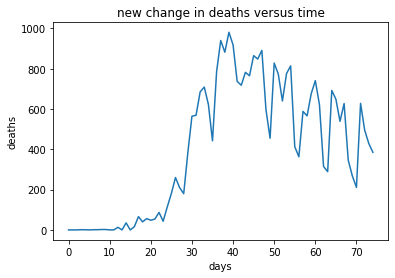

In [19]:
plt.plot(dfuk['datefrom'], dfuk['changedeathsnew'])
plt.title('new change in deaths versus time')
plt.xlabel('days')
plt.ylabel('deaths')

Now an approach could be to normalize both of them so that I can see what they are doing.. how? 
Divide by mean.. don't want to change std dev
taken from when values become significant (im saying 30 days for deaths)

In [20]:
changedeaths_mean = dfuk['changedeathsnew'][30:].mean()
changecases_mean = dfuk['changecases'][30:].mean()
print('change deaths mean: {}, change cases mean: {}'.format(changedeaths_mean, changecases_mean))

change deaths mean: 631.7777777777778, change cases mean: 4722.733333333334


In [21]:
dfuk['changedeath_norm'] = dfuk['changedeathsnew']/changedeaths_mean
dfuk['changecases_norm'] = dfuk['changecases']/changecases_mean

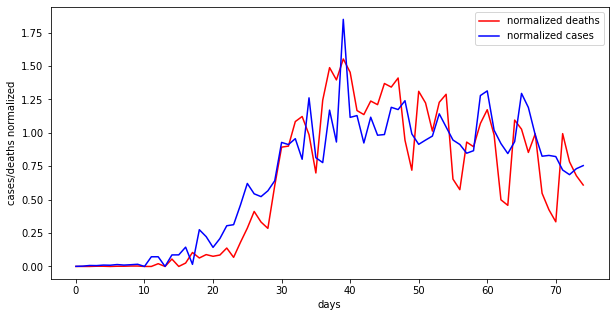

In [22]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
axs.plot(dfuk['datefrom'], dfuk['changedeath_norm'], color='red', label='normalized deaths')
axs.plot(dfuk['datefrom'], dfuk['changecases_norm'], color='blue', label='normalized cases')
axs.set_xlabel('days')
axs.set_ylabel('cases/deaths normalized')
axs.legend()


In [23]:
stats.pearsonr(dfuk['changedeath_norm'], dfuk['changecases_norm'])

(0.9040395030589496, 1.1637690334557334e-28)

About :
r value = correlaion with results (how correlated) : 
       
     sum ((x-m_x)(y-m_y))
r = -----------------------
    sqrt ( sum((x-m_x))**2 * sum(( y-m_y)**2) 
    
    Learn more about r value.
    
    p value : (secondb one : )

In [24]:
rlist = list()
for i in range(1,20):
    tmp1,s = stats.pearsonr(dfuk['changedeath_norm'][:-i], dfuk['changecases_norm'][i:])
    tmp2, s = stats.pearsonr(dfuk['changedeath_norm'][i:], dfuk['changecases_norm'][:-i])
    rlist.append(tmp1)
    rlist.append(tmp2)

In [127]:
r_unchanged, _ = stats.pearsonr(dfuk['changedeath_norm'], dfuk['changecases_norm'])
rlist = np.array(rlist)
print(' maximum value is {} at index {}'.format(rlist.max(), np.where(rlist == rlist.max())))
print('number of indexes : {}', len(rlist))
print(r_unchanged)
print(rlist)

 maximum value is 0.900629433099737 at index (array([0]),)
number of indexes : {} 38
0.9040395030589496
[0.90062943 0.86117949 0.86558645 0.82714986 0.81855392 0.79331478
 0.77114158 0.80424193 0.78934226 0.82274721 0.79846003 0.83089796
 0.7839214  0.78477626 0.75443624 0.72568617 0.71985076 0.64288074
 0.65337949 0.61234909 0.59776802 0.64405661 0.58297937 0.61082027
 0.56675813 0.56615027 0.5442463  0.50007046 0.51219393 0.42824808
 0.44487594 0.35741366 0.38339415 0.29634886 0.31936998 0.2695122
 0.28884473 0.21405717]


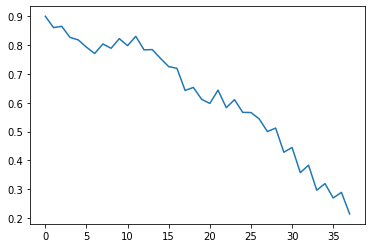

In [25]:
plt.plot(rlist)

In [26]:
from scipy import signal

In [27]:
len(dfuk['changedeath_norm'])


75

In [28]:
differences = list()
sumlist=list()
Numdays = 75
for i in range(1,20):
    t1 = np.sum((dfuk['changedeath_norm'][:-i] - dfuk['changecases_norm'][i:])**2)/(75-i)
    sumlist.append(t1)

In [29]:
sumlist.insert(0, (np.sum((dfuk['changedeath_norm'] - dfuk['changecases_norm'])**2))/(75))

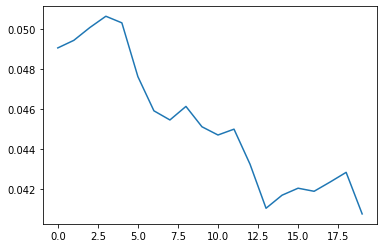

In [30]:
plt.plot(sumlist)

In [32]:
sumlist = np.array(sumlist)
ax_index = np.where(sumlist == sumlist.max())
print(ax_index)

(array([3]),)


From this it shows that a 3 day delay in cases results in a  --> probably not really right. ENphasis aswell here that the reporting is completely shit..! :( .. Few things to try : Running averages (Not weighted First lets do a bar graph of day reported as the actual day has a lot to do with reporating tactics (we will see)
    Also, Explanation for this correlation (and not longer/ equivilent to the estimated more like 7-14 day... It is expected that the initial detecting of cases was weak with respect to the testing now. This may have lead to a cluster of cases just before the cluster of deaths (detecting the cases only when they became serious, before the large spike in deaths). I guess this could be investigated by seeing the proportion of cases to deaths during this time, 

In [33]:
def create_chart(startday, length):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    out = list()
    for i in range(startday, startday+length):
        out.append(days[i%7])
    return out

In [34]:
dfuk.head()

,dates,cases,deaths,datefrom,changecases,changedeaths,changedeathsnew,changedeath_norm,changecases_norm
0,2020-03-02,40,0,0,4,0,0,0,0.000846967
1,2020-03-03,51,0,1,11,0,0,0,0.00232916
2,2020-03-04,85,0,2,34,0,0,0,0.00719922
3,2020-03-05,115,1,3,30,1,1,0.00158284,0.00635225
4,2020-03-06,163,2,4,48,1,1,0.00158284,0.0101636


Text(0.5, 1.0, 'Deaths per day')

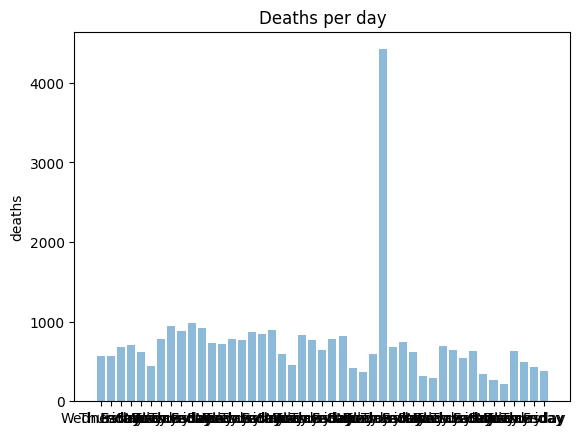

In [54]:
objects = tuple(whole[30:])
y_pos = np.arange(len(objects))
performance = dfuk['changedeaths'][30:]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('deaths')
plt.title('Deaths per day')

/home/guyh/Documents/tensorflow/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/home/guyh/Documents/tensorflow/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


Text(0.5, 1.0, 'graph showing new deaths')

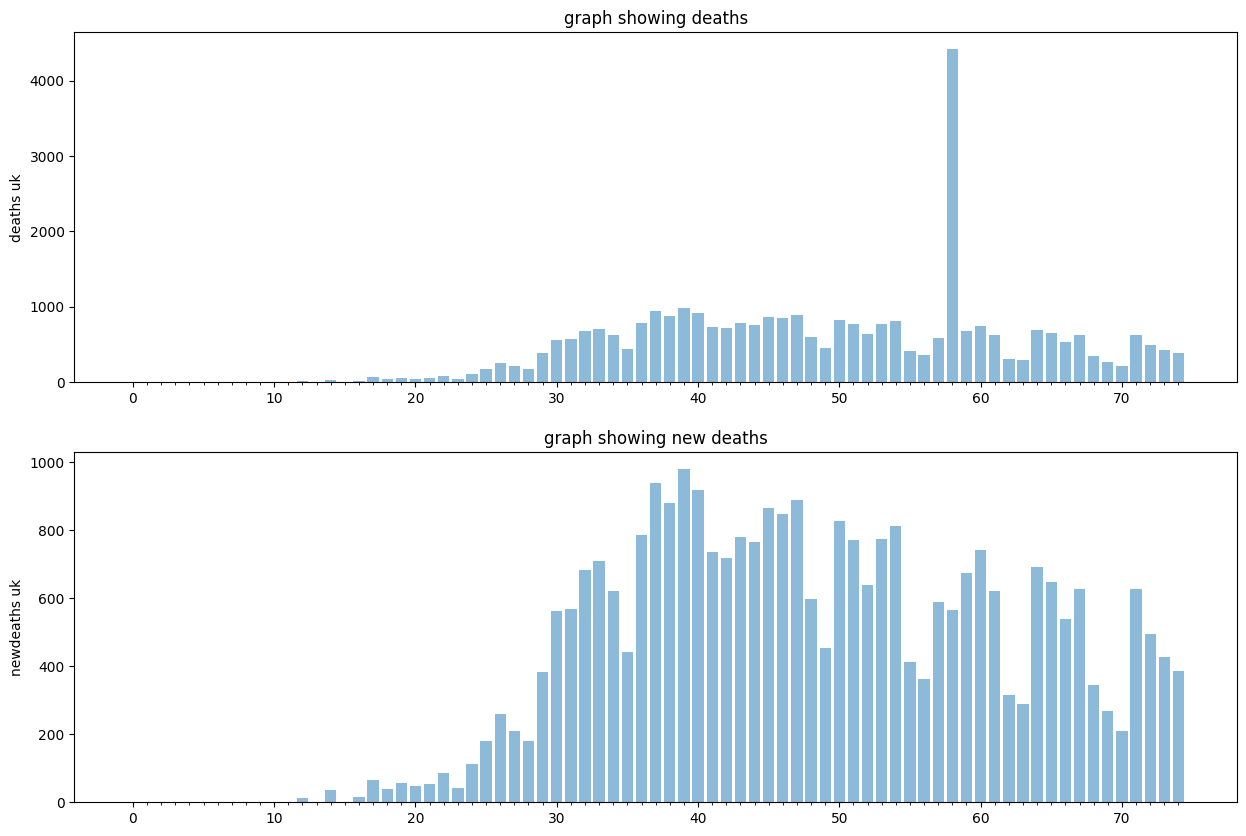

In [50]:
whole = create_chart(0, 75)
assert whole[0] == 'Monday'
objects = tuple(whole)
y_pos = np.arange(len(objects))
measured = dfuk['changedeaths']
fig, axs = plt.subplots(2,1, figsize=(15,10))
axs = axs.ravel()
axs[0].bar(y_pos, measured, align='center', alpha=0.5)
axs[0].set_xticks(y_pos, objects)
axs[0].set_ylabel('deaths uk')
axs[0].set_title('graph showing deaths')

axs[1].bar(y_pos, dfuk['changedeathsnew'], align='center', alpha=0.5)
axs[1].set_xticks(y_pos,objects)
axs[1].set_ylabel('newdeaths uk')
axs[1].set_title('graph showing new deaths')

    

Hey, lets do something cool... lets look at the weekly variation of case reporting

In [38]:
dfuk['day'] = np.array(whole)
dfuk.head()

,dates,cases,deaths,datefrom,changecases,changedeaths,changedeathsnew,changedeath_norm,changecases_norm,day
0,2020-03-02,40,0,0,4,0,0,0,0.000846967,Monday
1,2020-03-03,51,0,1,11,0,0,0,0.00232916,Tuesday
2,2020-03-04,85,0,2,34,0,0,0,0.00719922,Wednesday
3,2020-03-05,115,1,3,30,1,1,0.00158284,0.00635225,Thursday
4,2020-03-06,163,2,4,48,1,1,0.00158284,0.0101636,Friday


In [44]:
w_death = list()
w_case = list()
w_deathnew = list()
w_casenew = list()
weeks = list()
#offset by 5 (as 75 : take away 5 to get most recent put into weeks :) )
for i in range(0,10):
    w_death.append(dfuk.loc[i*7+5, 'deaths'])
    w_case.append(dfuk.loc[i*7+5, 'cases'])
    w_casenew.append(np.sum(dfuk.loc[i*7+5:i*7+5+7, 'changecases']))
    w_deathnew.append(np.sum(dfuk.loc[i*7+5:i*7+7+5, 'changedeathsnew']))
    weeks.append('Week{}'.format(i))



In [105]:
dfukw = pd.DataFrame()
dfukw['week'] = np.array(weeks)
dfukw['deaths'] = np.array(w_death)
dfukw['cases'] = np.array(w_case)
dfukw['newcases'] = np.array(w_casenew)
dfukw['newdeath'] = np.array(w_deathnew)
dfukw.head()


,week,deaths,cases,newcases,newdeath
0,Week0,2,206,980,19
1,Week1,21,1143,4266,226
2,Week2,234,5067,13298,843
3,Week3,1021,17312,27732,3559
4,Week4,4320,42477,41185,6281


This in a lot of ways is equivilent to a weighted average. Below we will plot, thereafter attempting to 

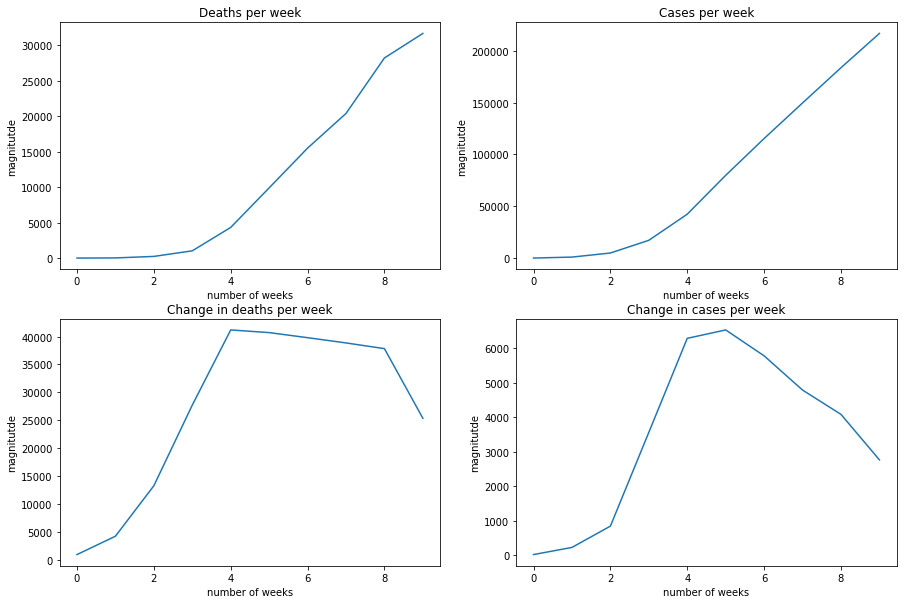

In [46]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.ravel()
titles = ['Deaths per week', 'Cases per week', 'Change in deaths per week', \
        'Change in cases per week']
ylabel = 'magnitutde'
xlabel = 'number of weeks'
toplot = ['deaths', 'cases', 'newcases', 'newdeath']

for title, plot, ax in zip(titles, toplot, axs):
    ax.plot(dfukw[plot])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

Okay, Now just for a general look. I want to see variation every day. In the dfuk lets add a thee week its in so that we can compare each of the weeks :) 

0 is week 0 , 75 datapoints -> 10 weeks, 5 days --> use of int /7

In [104]:
week = list()
for i in range(75):
    week.append(int(i/7))
dfuk['week'] = week
dfuk.head()

,dates,cases,deaths,datefrom,changecases,changedeaths,changedeathsnew,changedeath_norm,changecases_norm,day,week
0,2020-03-02,40,0,0,4,0,0,0,0.000846967,Monday,0
1,2020-03-03,51,0,1,11,0,0,0,0.00232916,Tuesday,0
2,2020-03-04,85,0,2,34,0,0,0,0.00719922,Wednesday,0
3,2020-03-05,115,1,3,30,1,1,0.00158284,0.00635225,Thursday,0
4,2020-03-06,163,2,4,48,1,1,0.00158284,0.0101636,Friday,0


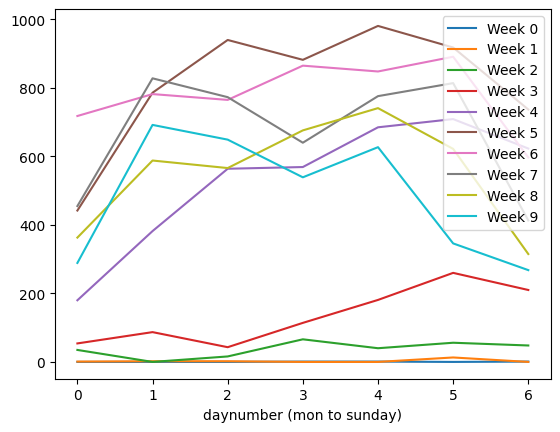

In [83]:
for i in range(10):
    plt.plot([i for i in range(7)],dfuk[dfuk['week']==i].loc[:,'changedeathsnew'],\
            label='Week {}'.format(i))
    plt.xlabel('daynumber (mon to sunday)')
plt.legend(loc='upper right')


Notable declines on sunday and monday!and notable weekly variation. avoid comparisons with weeks 0, 1, 2, 3: start/ low/ assumed no distributing policy given yet.
nb : seems to always be a dip on thursday why? political/ nhs policy reasoning.. further research

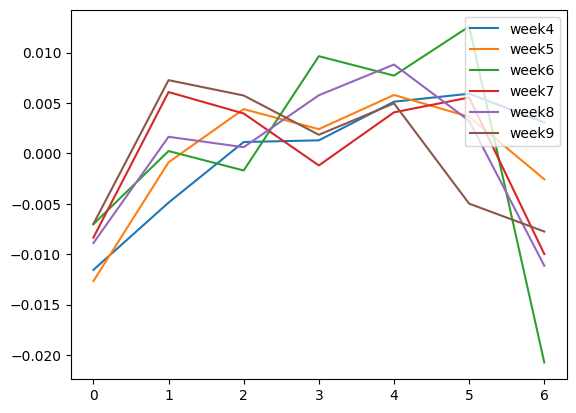

In [120]:
_weeks = list()
normalised = list()
for i in range(4, 10):
    weekdata = np.array(dfuk[dfuk['week']==i].loc[:,'changedeathsnew'])
    meandata = weekdata.mean() # average daily increase
    var = weekdata.var()
    norm = (weekdata-meandata)/var
    normalised.append(norm)
    plt.plot(norm, label = 'week{}'.format(i))

plt.legend(loc='upper right')

In [93]:
#finding normalised average of each day in the week! :) 
dfndays = pd.DataFrame()
dfndays['day'] = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, week in zip(range(0,6), range(4,10)):
    dfndays['week{}'.format(week)] = normalised[i]

In [98]:
columnstoshow = ['week{}'.format(i) for i in range(4,10)]
dfndays[columnstoshow].agg([np.mean, np.std, np.min, 
                                            np.max])
# whats the point. I should be doing this with non normalised data.b

,week4,week5,week6,week7,week8,week9
mean,0.000009,0.000010,0.000097,0.000011,0.000000,0.000005
std,0.006210,0.006323,0.011502,0.006723,0.007394,0.006428
amin,-0.011568,-0.012679,-0.020753,-0.009994,-0.011153,-0.007757
amax,0.005916,0.005791,0.012588,0.006082,0.008810,0.007261


In [106]:
we = ['Week{}'.format(i) for i in range(10)]
num = [i for i in range(10)]
dic = dict(zip(we,num))
dfukw['week'] =dfukw['week'].map(dic)

In [114]:
columnstoshow = ['week{}'.format(i) for i in range(4,10)]
dfndays['average'] = dfndays[columnstoshow].mean(axis=1)

In [116]:
dfndays.head()

,day,week4,week5,week6,week7,week8,week9,average
0,Monday,-0.0115678,-0.0126786,-0.00703098,-0.00836712,-0.00890394,-0.0070135,-0.009260
1,Tuesday,-0.00489151,-0.000890928,0.000226806,0.00608165,0.0016402,0.00726145,0.001571
2,Wednesday,0.00112373,0.00438611,-0.00170104,0.00395114,0.000609217,0.00573832,0.002351
3,Thursday,0.00128898,0.00239865,0.00963924,-0.00120084,0.00576413,0.00184193,0.003289
4,Friday,0.00512287,0.00579103,0.00771139,0.00406735,0.00881022,0.00495904,0.006077


Text(0, 0.5, 'relative difference (units unimportant, relative units are important)')

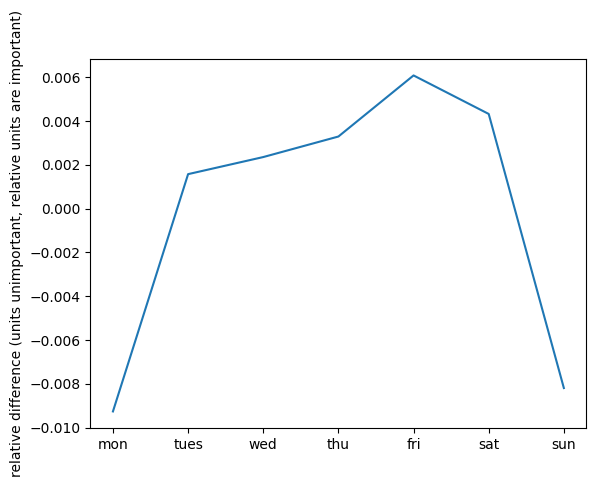

In [119]:
plt.plot(dfndays['average'])
plt.xticks([i for i in range(7)], ['mon', 'tues', 'wed', 'thu' ,'fri','sat', 'sun'])
plt.ylabel('relative difference (units unimportant, relative units are important)')

Highest on friday, thurs - fri highest rating... Lowest (by large margin on sunday and monday . a bit low tuesday thursday.
Basic conclusions : the reporting of data is a mess